In [1]:
%matplotlib inline
import sys
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

# 운영체제별로 기본 폰트가 다릅니다.
if "darwin" in sys.platform:
    plt.rcParams['font.family'] = 'AppleGothic'  # 맥 기본 폰트
elif "win" in sys.platform:
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 폰트
else:
    print(f"{sys.platform}은 폰트 직접 지정이 필요합니다.")  # 윈도우/맥 외에 리눅스 등의 플랫폼
    sys.exit(1)

from tqdm import tqdm_notebook   # pip install tqdm
from libs import stock_daum, stock_naver

## 코스피 종목코드 수집

In [2]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://bit.ly/3g5YKXT", index_col='종목명', dtype={'종목코드': str})
print(kospi_df.shape)
kospi_df.head()

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [3]:
kospi_series = kospi_df['종목코드']
kospi_series.head()

종목명
미원에스씨     268280
경동도시가스    267290
넷마블게임즈    251270
아이엔지생명    079440
현대건설기계    267270
Name: 종목코드, dtype: object

## 종목별 실시간 시세 시각화

In [4]:
code = kospi_series['삼성전자']
삼성전자_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

code = kospi_series['LG전자']
LG전자_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

In [5]:
print(삼성전자_volume_df.shape)
삼성전자_volume_df.head()

(200, 6)


,체결가,전일비,매도,매수,거래량,변동량
체결시각,,,,,,
2024-10-07 15:58:00,61000.0,상승 400,0.0,61000.0,34794039.0,142.0
2024-10-07 15:57:00,61000.0,상승 400,0.0,61000.0,34793897.0,4.0
2024-10-07 15:56:00,61000.0,상승 400,0.0,61000.0,34793893.0,789.0
2024-10-07 15:55:00,61000.0,상승 400,0.0,61000.0,34793104.0,132.0
2024-10-07 15:54:00,61000.0,상승 400,0.0,61000.0,34792972.0,137.0


<Axes: xlabel='체결시각'>

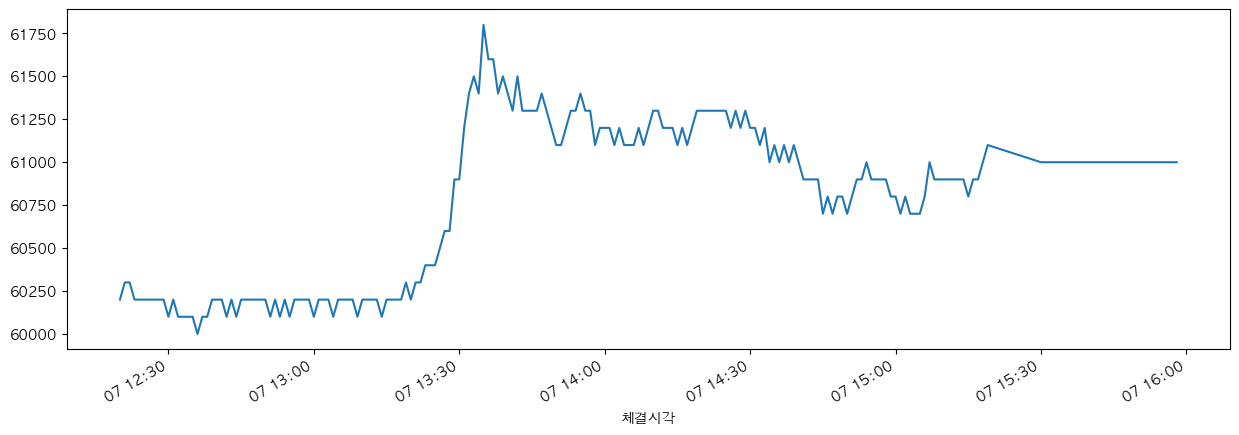

In [6]:
삼성전자_volume_df['체결가'].plot(figsize=(15, 5))

<Axes: xlabel='체결시각'>

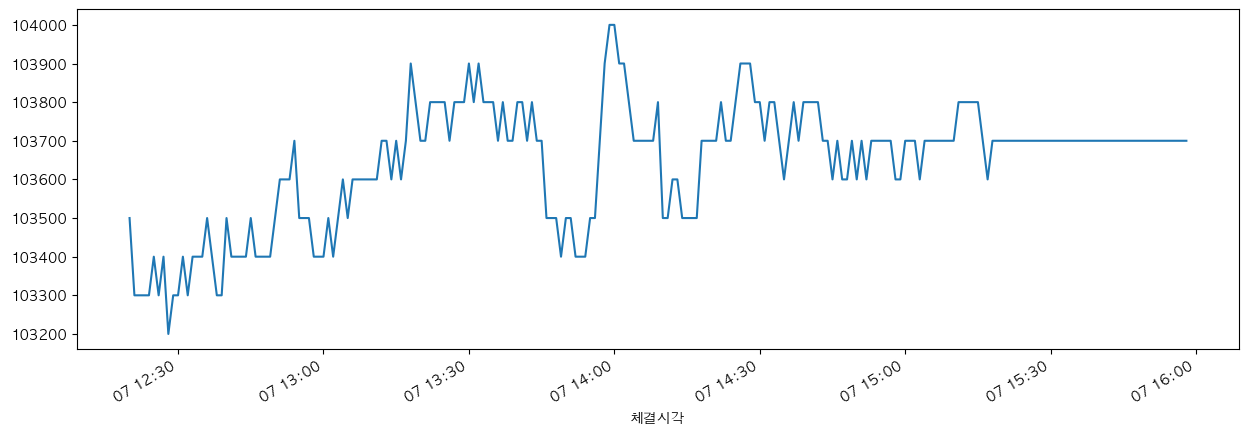

In [7]:
LG전자_volume_df['체결가'].plot(figsize=(15, 5))

<Axes: xlabel='체결시각'>

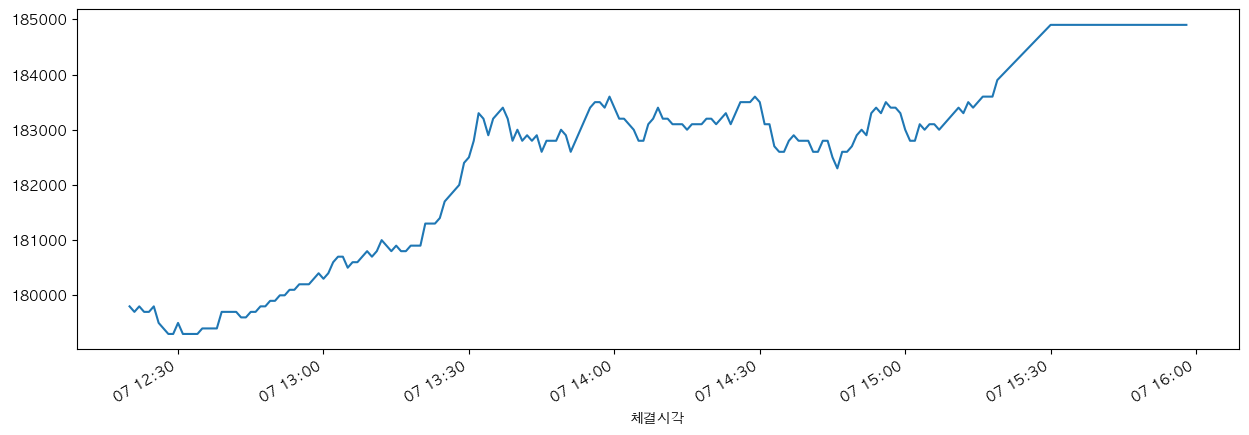

In [8]:
SK하이닉스_volume_df['체결가'].plot(figsize=(15, 5))

## 하나의 DataFrame으로 처리

In [9]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['체결가'],
    'LG전자': LG전자_volume_df['체결가'],
    'SK하이닉스': SK하이닉스_volume_df['체결가'],
})

start_ts = df.iloc[0].name
end_ts = df.iloc[-1].name

print(start_ts, '~', end_ts)

print(df.shape)
df.head()

2024-10-07 15:58:00 ~ 2024-10-07 12:20:00
(200, 3)


,삼성전자,LG전자,SK하이닉스
체결시각,,,
2024-10-07 15:58:00,61000.0,103700.0,184900.0
2024-10-07 15:57:00,61000.0,103700.0,184900.0
2024-10-07 15:56:00,61000.0,103700.0,184900.0
2024-10-07 15:55:00,61000.0,103700.0,184900.0
2024-10-07 15:54:00,61000.0,103700.0,184900.0


## 체결가 시각화

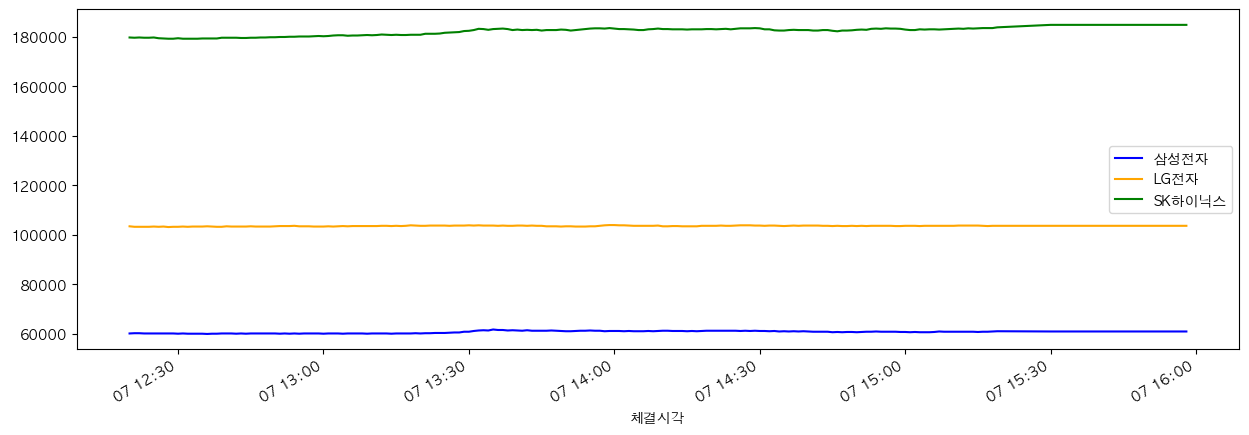

In [10]:
ax = df.plot(figsize=(15, 5), color=['blue', 'orange', 'green'])

In [11]:
df2 = pd.DataFrame({
#     '삼성전자': 삼성전자_volume_df['체결가'],
    'LG전자': LG전자_volume_df['체결가'],
    'SK하이닉스': SK하이닉스_volume_df['체결가'],
})
print(df2.shape)
df2.head()

(200, 2)


,LG전자,SK하이닉스
체결시각,,
2024-10-07 15:58:00,103700.0,184900.0
2024-10-07 15:57:00,103700.0,184900.0
2024-10-07 15:56:00,103700.0,184900.0
2024-10-07 15:55:00,103700.0,184900.0
2024-10-07 15:54:00,103700.0,184900.0


<Axes: xlabel='체결시각'>

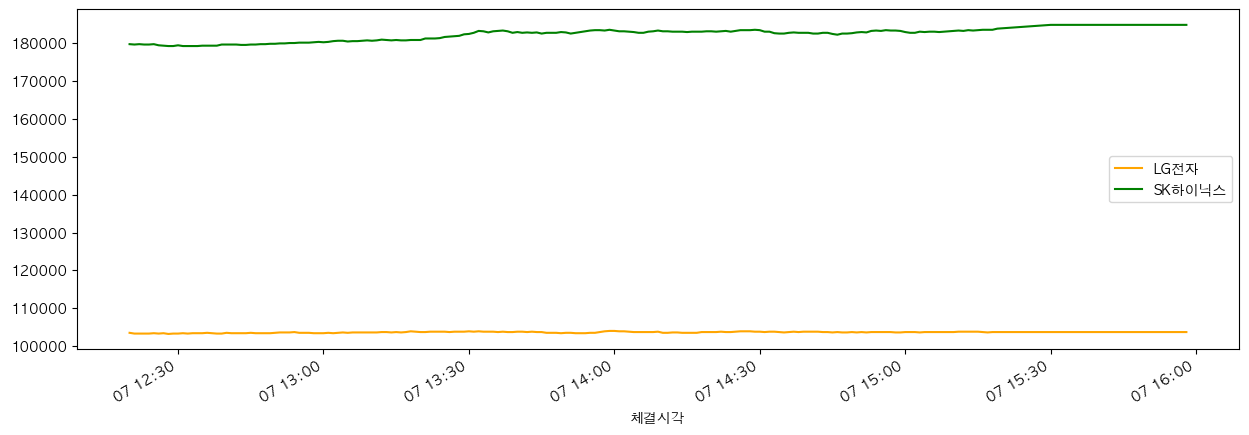

In [12]:
df2.plot(figsize=(15, 5), color=['orange', 'green'])